In [1]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt


In [2]:
# Get data
symbol = "BTCUSDT"
timeFrame = "1h"
startDate = "2019-01-21"
endDate = "2022-07-22"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,3539.26,3549.07,3537.94,3539.00,700.116019,2019-01-21 00:00:00
1,3539.00,3544.77,3531.90,3539.61,499.241032,2019-01-21 01:00:00
2,3537.19,3547.00,3535.01,3535.81,689.470484,2019-01-21 02:00:00
3,3535.81,3536.68,3520.00,3530.95,773.444269,2019-01-21 03:00:00
4,3530.85,3534.94,3501.00,3523.86,1064.101921,2019-01-21 04:00:00
...,...,...,...,...,...,...
30609,23194.40,23308.80,23089.97,23120.65,9085.921050,2022-07-21 20:00:00
30610,23120.65,23250.00,23077.30,23207.99,3458.932120,2022-07-21 21:00:00
30611,23207.99,23231.35,22931.35,23017.08,6007.129070,2022-07-21 22:00:00
30612,23017.08,23233.09,23000.17,23152.19,4726.895620,2022-07-21 23:00:00


In [3]:
# SMA strategy
sma_parameters = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.1,                                  ## float
    "long_period": 100,                               ## long period of SMA curve
    "short_period": 30,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

money 1000.0 storage 0.0
side -1.0
amount -0.28021565396729325
n 2000.0 -0.28021565396729325
money 2000.0 storage -0.28021565396729325
side 1.0
amount 0.5616841537666539
n 2.2737367544323206e-13 0.28146849979936067
money 2.2737367544323206e-13 storage 0.28146849979936067
side -1.0
amount -0.5629369995987215
n 1998.8992156551244 -0.2814684997993608
money 1998.8992156551244 storage -0.2814684997993608
side 1.0
amount 0.5814776547888145
n 0.0 0.30000915498945374
money 0.0 storage 0.30000915498945374
side -1.0
amount -0.6000183099789075
n 2081.4815178661297 -0.30000915498945374
money 2081.4815178661297 storage -0.30000915498945374
side 1.0
amount 0.6011603140750827
n 0.0 0.301151159085629
money 0.0 storage 0.301151159085629
side -1.0
amount -0.602302318171258
n 2058.079067237552 -0.301151159085629
money 2058.079067237552 storage -0.301151159085629
side 1.0
amount 0.5632354050835795
n 0.0 0.2620842459979505
money 0.0 storage 0.2620842459979505
side -1.0
amount -0.524168491995901
n 1898.7164

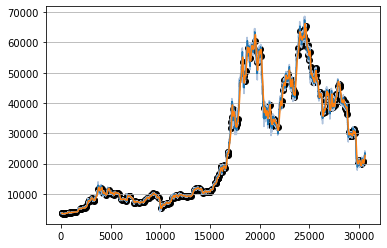

In [4]:
a, _, _,_, _ = sma.back_test(df)
# print(a)

In [ ]:
b = pd.Series([1,2,3])
b.diff()

0    NaN
1    1.0
2    1.0
dtype: float64

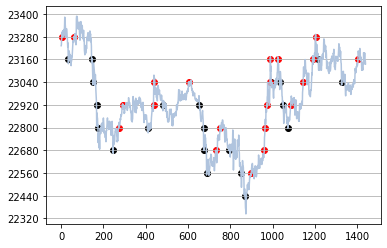

strategy: grid , trading count: 42 , profit: 0.0007063019999988 , sharpe ratio: -376.6503032887417 MDD: 0.0007922679080881095


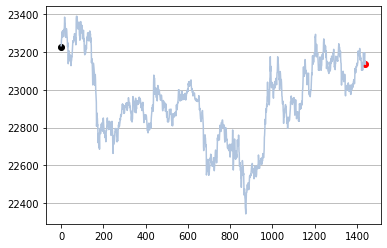

strategy: buy and hold , trading count: 2 , profit: -0.0037216932994019064 , sharpe ratio: -2.0029940745488433 MDD: 0.04464284569013179


In [ ]:
profit, trading_count, buy_record, sell_record, MDD = myGrid.back_test(df)
sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(myGrid, df, 0.02, window_size=100, window_off=100)
print("strategy:", myGrid.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio, "MDD:", MDD)

profit, trading_count, buy_record, sell_record, MDD = buy_and_hodl.back_test(df)
sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=100, window_off=100)
print("strategy:", buy_and_hodl.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio, "MDD:", MDD)

*-------------Initial State-------------*
| >> strategy: buy and hold
| >> money: 1000.0
| >> storage: 0.0
| >> guarantee money: None
| >> trading count: 0
| Total value: 1000.0
| Profit: 0.0
| Current price: 0
| Time: 2022-08-27 12:54:22.247111

*---------------------------------------*
| >> strategy: buy and hold
| >> money: 0.0
| >> storage: 0.04958517046389902
| >> guarantee money: None
| >> trading count: 1
| Total value: 1000.0
| Profit: 0.0
| Current price: 20167.32
| Time: 2022-08-27 12:54:22.293678

*---------------------------------------*
| >> strategy: buy and hold
| >> money: 1000.2573470347075
| >> storage: 0.0
| >> guarantee money: None
| >> trading count: 2
| Total value: 1000.2573470347075
| Profit: 0.00025734703470754993
| Current price: 20172.51
| Time: 2022-08-27 12:54:33.129729



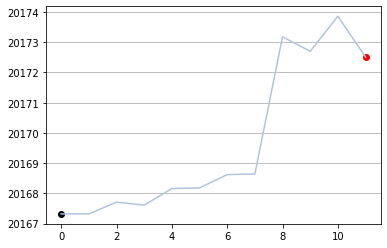

In [ ]:
buy_and_hodl.realtime_test("BTCUSDT", "00:00:01,000", "00:00:10,000")

*-------------Initial State-------------*
| >> strategy: grid
| >> money: 1000.0
| >> storage: 0.0
| >> guarantee money: 1000.0
| >> trading count: 0
| Total value: 1000.0
| Profit: 0.0
| Current price: 20172.76
| Time: 2022-08-27 12:54:33.450392



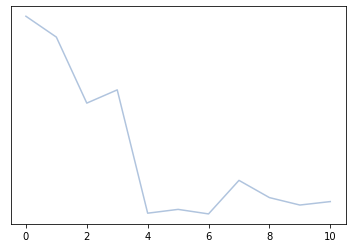

In [ ]:
# Grid strategy
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
    "grid_number" : 600,                              ## int  
    "equal_Diff_or_Ratio" : "DIFF",                   ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "protion":0.0},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 24300,                           ## float
    "highest_price" : 24500.0                         ## float
}
myGrid = Strategies.Grid(grid_parameters)
myGrid.realtime_test("BTCUSDT", "00:00:01,000", "00:00:10,000")
